# Data load

In [9]:
import pandas as pd
matrix = pd.read_csv('recap_data.csv')
matrix

Unnamed: 0      file  F0final_sma_stddev  F0final_sma_amean  \
0              1   122.csv           72.455493         121.999593   
1              2   736.csv           55.493567         174.128629   
2              3  1042.csv           39.409995         106.558921   
3              4  1275.csv           22.590408          82.188975   
4              5  1892.csv           65.854057         113.440481   
...          ...       ...                 ...                ...   
1738        1739   357.csv           44.839563         111.343268   
1739        1740  1648.csv           55.258397         141.024205   
1740        1741  1493.csv          157.875615         412.318588   
1741        1742  1784.csv           64.431062         108.279179   
1742        1743  1224.csv           27.091138          86.051487   

      voicingFinalUnclipped_sma_stddev  voicingFinalUnclipped_sma_amean  \
0                             0.032615                         0.743192   
1                             0.032542                         0.785903   
2                             0.037863                         0.772938   
3                             0.033827                         0.763277   
4                             0.029411                         0.743594   
...                                ...                              ...   
1738                          0.036957                         0.768153   
1739                          0.027661                         0.798257   
1740                          0.084103                         0.806587   
1741                          0.070644                         0.758823   
1742                          0.039693                         0.773344   

      jitterLocal_sma_stddev  jitterLocal_sma_amean  jitterDDP_sma_stddev  \
0                   0.121745               0.078061              0.133986   
1                   0.072172               0.051077              0.085079   
2                   0.127640               0.094258              0.143104   
3                   0.104742               0.072661              0.103858   
4                   0.107730               0.075472              0.112885   
...                      ...                    ...                   ...   
1738                0.113309               0.070202              0.123682   
1739                0.135815               0.084960              0.159669   
1740                0.038528               0.023111              0.036928   
1741                0.124175               0.075927              0.142210   
1742                0.084674               0.051586              0.084044   

      jitterDDP_sma_amean  ...  pcm_fftMag_mfcc_sma_de[11]_stddev  \
0                0.088676  ...                           2.132022   
1                0.053610  ...                           1.336499   
2                0.103178  ...                           2.221844   
3                0.071290  ...                           2.215059   
4                0.078096  ...                           2.329009   
...                   ...  ...                                ...   
1738             0.076547  ...                           1.955979   
1739             0.101305  ...                           1.945865   
1740             0.019565  ...                           4.364806   
1741             0.090704  ...                           2.248901   
1742             0.057365  ...                           2.175545   

      pcm_fftMag_mfcc_sma_de[11]_amean  pcm_fftMag_mfcc_sma_de[12]_stddev  \
0                            -0.000408                           1.971246   
1                             0.000298                           1.217145   
2                            -0.003346                           2.156892   
3                            -0.001149                           1.937555   
4                            -0.000771                           2.004704   
...                                ...                      

# Select explicative and objective variables

In [10]:
explicative = matrix.drop(columns=['valence', 'file', 'Unnamed: 0', 'arousal'])
objective_valence = matrix.valence
objective_arousal = matrix.arousal


# ML models for valence

* Split data in test and training

In [4]:
from sklearn.model_selection import train_test_split
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(explicative, objective_valence, test_size=0.03, random_state=42)

* Decission tree model

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

grid_hp_tree_reg = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
    'splitter': ['best', 'random'], 
    'max_depth': [3, 5, 7], 
    'min_samples_split': [2, 4], 
    'min_samples_leaf': [1, 3], 
    'max_features': [None, 'sqrt', 'log2'], 
    'random_state': [None, 3, 5],
    'max_leaf_nodes': [None, 3]
}

tree_regr_model_valence = GridSearchCV(
    estimator = DecisionTreeRegressor(), 
    param_grid = grid_hp_tree_reg, 
    cv = 5,
    n_jobs = -1,
    verbose = 10,
)

tree_regr_model_valence.fit(X_train_val, y_train_val)


Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
[CV 4/5; 1/1296] START criterion=squared_error, max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, random_state=None, splitter=best
[CV 4/5; 1/1296] END criterion=squared_error, max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, random_state=None, splitter=best;, score=0.318 total time=   0.1s
[CV 1/5; 2/1296] START criterion=squared_error, max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, random_state=None, splitter=random
[CV 1/5; 2/1296] END criterion=squared_error, max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, random_state=None, splitter=random;, score=0.376 total time=   0.0s
[CV 4/5; 2/1296] START criterion=squared_error, max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, random_state=None, splitter

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [3, 5, 7],
                         'max_features': [None, 'sqrt', 'log2'],
                         'max_leaf_nodes': [None, 3],
                         'min_samples_leaf': [1, 3],
                         'min_samples_split': [2, 4],
                         'random_state': [None, 3, 5],
                         'splitter': ['best', 'random']},
             verbose=10)

In [18]:
tree_regr_model_valence.best_params_

{'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'random_state': None,
 'splitter': 'best'}

In [20]:
tree_regr_model_valence.score(X_test_val, y_test_val)

0.3039036181270932

[CV 4/5; 1284/1296] END criterion=absolute_error, max_depth=7, max_features=log2, max_leaf_nodes=3, min_samples_leaf=1, min_samples_split=4, random_state=5, splitter=random;, score=0.024 total time=   0.0s
[CV 5/5; 1284/1296] START criterion=absolute_error, max_depth=7, max_features=log2, max_leaf_nodes=3, min_samples_leaf=1, min_samples_split=4, random_state=5, splitter=random
[CV 5/5; 1284/1296] END criterion=absolute_error, max_depth=7, max_features=log2, max_leaf_nodes=3, min_samples_leaf=1, min_samples_split=4, random_state=5, splitter=random;, score=0.057 total time=   0.0s
[CV 5/5; 1285/1296] START criterion=absolute_error, max_depth=7, max_features=log2, max_leaf_nodes=3, min_samples_leaf=3, min_samples_split=2, random_state=None, splitter=best
[CV 5/5; 1285/1296] END criterion=absolute_error, max_depth=7, max_features=log2, max_leaf_nodes=3, min_samples_leaf=3, min_samples_split=2, random_state=None, splitter=best;, score=0.215 total time=   0.2s
[CV 1/5; 1286/1296] START crit

* Random forest

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

grid_hp_random_forest = {
    'n_estimators': [100, 200],
    'criterion': ['squared_error', 'absolute_error'],
    'max_depth': [None, 5, 10], 
    'min_samples_split': [2, 4], 
    'min_samples_leaf': [1, 3], 
    'max_features': [None, 'sqrt', 'log2'], 
    'random_state': [None, 3, 5],
    'max_leaf_nodes': [None, 3],
    'bootstrap': [True, False]
}

random_forest_model_valence = GridSearchCV(
    estimator = RandomForestRegressor(), 
    param_grid = grid_hp_random_forest, 
    cv = 2,
    n_jobs = -1,
    verbose = 10,
)

random_forest_model_valence.fit(X_train_val, y_train_val)

Fitting 2 folds for each of 1728 candidates, totalling 3456 fits
[CV 1/2; 1/1728] START bootstrap=True, criterion=squared_error, max_depth=None, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=None
[CV 1/2; 1/1728] END bootstrap=True, criterion=squared_error, max_depth=None, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=None;, score=0.518 total time=  16.7s
[CV 2/2; 4/1728] START bootstrap=True, criterion=squared_error, max_depth=None, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=None
[CV 2/2; 4/1728] END bootstrap=True, criterion=squared_error, max_depth=None, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=None;, score=0.492 total time=  29.7s
[CV 1/2; 6/1728] START bootstrap=True, criterion=squared_error, max_depth=None, max_f

In [ ]:
random_forest_model_valence.best_params_

In [ ]:
random_forest_model_valence.score(X_train_val, y_train_val)

* Linear regression

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

grid_hp_linear_reg = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [None, -1],
    'positive': [True, False]
}

linear_reg_model_valence = GridSearchCV(
    estimator = LinearRegression(), 
    param_grid = grid_hp_linear_reg, 
    cv = 5,
    n_jobs = -1,
    verbose = 10,
)

linear_reg_model_valence.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [None, -1],
                         'positive': [True, False]},
             verbose=10)

In [26]:
linear_reg_model_valence.best_params_

{'copy_X': True, 'fit_intercept': False, 'n_jobs': None, 'positive': True}

* Ridge Regression 

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

grid_hp_ridge_reg = {
    'alpha': [1.0, 5.0],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'],
    'max_iter': [None, 1000, 15000],
    'positive': [True, False],
    'random_state': [None, 3, 5]
}

ridge_reg_model_valence = GridSearchCV(
    estimator = Ridge(), 
    param_grid = grid_hp_ridge_reg, 
    cv = 5,
    n_jobs = -1,
    verbose = 10,
)

ridge_reg_model_valence.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.45101e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.30895e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.30741e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.62768e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.

[CV 2/5; 1/288] START alpha=1.0, max_iter=None, positive=True, random_state=None, solver=auto
[CV 2/5; 1/288] END alpha=1.0, max_iter=None, positive=True, random_state=None, solver=auto;, score=0.184 total time=   0.0s
[CV 1/5; 2/288] START alpha=1.0, max_iter=None, positive=True, random_state=None, solver=svd
[CV 1/5; 2/288] END alpha=1.0, max_iter=None, positive=True, random_state=None, solver=svd;, score=nan total time=   0.0s
[CV 4/5; 2/288] START alpha=1.0, max_iter=None, positive=True, random_state=None, solver=svd
[CV 4/5; 2/288] END alpha=1.0, max_iter=None, positive=True, random_state=None, solver=svd;, score=nan total time=   0.0s
[CV 3/5; 3/288] START alpha=1.0, max_iter=None, positive=True, random_state=None, solver=cholesky
[CV 3/5; 3/288] END alpha=1.0, max_iter=None, positive=True, random_state=None, solver=cholesky;, score=nan total time=   0.0s
[CV 2/5; 4/288] START alpha=1.0, max_iter=None, positive=True, random_state=None, solver=lsqr
[CV 2/5; 4/288] END alpha=1.0, m

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.30741e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.30895e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.94677e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.62768e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.

[CV 1/5; 1/288] START alpha=1.0, max_iter=None, positive=True, random_state=None, solver=auto
[CV 1/5; 1/288] END alpha=1.0, max_iter=None, positive=True, random_state=None, solver=auto;, score=0.138 total time=   0.0s
[CV 2/5; 2/288] START alpha=1.0, max_iter=None, positive=True, random_state=None, solver=svd
[CV 2/5; 2/288] END alpha=1.0, max_iter=None, positive=True, random_state=None, solver=svd;, score=nan total time=   0.0s
[CV 5/5; 2/288] START alpha=1.0, max_iter=None, positive=True, random_state=None, solver=svd
[CV 5/5; 2/288] END alpha=1.0, max_iter=None, positive=True, random_state=None, solver=svd;, score=nan total time=   0.0s
[CV 4/5; 3/288] START alpha=1.0, max_iter=None, positive=True, random_state=None, solver=cholesky
[CV 4/5; 3/288] END alpha=1.0, max_iter=None, positive=True, random_state=None, solver=cholesky;, score=nan total time=   0.0s
[CV 3/5; 4/288] START alpha=1.0, max_iter=None, positive=True, random_state=None, solver=lsqr
[CV 3/5; 4/288] END alpha=1.0, m

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.30741e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.94677e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.45101e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.30741e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.

[CV 5/5; 35/288] START alpha=1.0, max_iter=None, positive=False, random_state=3, solver=cholesky
[CV 5/5; 35/288] END alpha=1.0, max_iter=None, positive=False, random_state=3, solver=cholesky;, score=0.475 total time=   0.0s
[CV 1/5; 36/288] START alpha=1.0, max_iter=None, positive=False, random_state=3, solver=lsqr
[CV 1/5; 36/288] END alpha=1.0, max_iter=None, positive=False, random_state=3, solver=lsqr;, score=0.186 total time=   0.0s
[CV 2/5; 36/288] START alpha=1.0, max_iter=None, positive=False, random_state=3, solver=lsqr
[CV 2/5; 36/288] END alpha=1.0, max_iter=None, positive=False, random_state=3, solver=lsqr;, score=0.196 total time=   0.0s
[CV 3/5; 36/288] START alpha=1.0, max_iter=None, positive=False, random_state=3, solver=lsqr
[CV 3/5; 36/288] END alpha=1.0, max_iter=None, positive=False, random_state=3, solver=lsqr;, score=0.163 total time=   0.0s
[CV 4/5; 36/288] START alpha=1.0, max_iter=None, positive=False, random_state=3, solver=lsqr
[CV 4/5; 36/288] END alpha=1.0,

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.30741e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.94677e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.30895e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: 

[CV 4/5; 32/288] END alpha=1.0, max_iter=None, positive=False, random_state=None, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5; 32/288] START alpha=1.0, max_iter=None, positive=False, random_state=None, solver=lbfgs
[CV 5/5; 32/288] END alpha=1.0, max_iter=None, positive=False, random_state=None, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5; 33/288] START alpha=1.0, max_iter=None, positive=False, random_state=3, solver=auto
[CV 1/5; 33/288] END alpha=1.0, max_iter=None, positive=False, random_state=3, solver=auto;, score=0.490 total time=   0.0s
[CV 2/5; 33/288] START alpha=1.0, max_iter=None, positive=False, random_state=3, solver=auto
[CV 2/5; 33/288] END alpha=1.0, max_iter=None, positive=False, random_state=3, solver=auto;, score=0.421 total time=   0.0s
[CV 3/5; 33/288] START alpha=1.0, max_iter=None, positive=False, random_state=3, solver=auto
[CV 3/5; 33/288] END alpha=1.0, max_iter=None, positive=False, random_state=3, solver=auto;, score=0.502 total time=   0.1s


/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.30741e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.94677e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.30895e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.62768e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.

[CV 5/5; 67/288] START alpha=1.0, max_iter=1000, positive=True, random_state=5, solver=cholesky
[CV 5/5; 67/288] END alpha=1.0, max_iter=1000, positive=True, random_state=5, solver=cholesky;, score=nan total time=   0.0s
[CV 1/5; 68/288] START alpha=1.0, max_iter=1000, positive=True, random_state=5, solver=lsqr
[CV 1/5; 68/288] END alpha=1.0, max_iter=1000, positive=True, random_state=5, solver=lsqr;, score=nan total time=   0.0s
[CV 2/5; 68/288] START alpha=1.0, max_iter=1000, positive=True, random_state=5, solver=lsqr
[CV 2/5; 68/288] END alpha=1.0, max_iter=1000, positive=True, random_state=5, solver=lsqr;, score=nan total time=   0.0s
[CV 3/5; 68/288] START alpha=1.0, max_iter=1000, positive=True, random_state=5, solver=lsqr
[CV 3/5; 68/288] END alpha=1.0, max_iter=1000, positive=True, random_state=5, solver=lsqr;, score=nan total time=   0.0s
[CV 4/5; 68/288] START alpha=1.0, max_iter=1000, positive=True, random_state=5, solver=lsqr
[CV 4/5; 68/288] END alpha=1.0, max_iter=1000, p

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn

[CV 2/5; 75/288] END alpha=1.0, max_iter=1000, positive=False, random_state=None, solver=cholesky;, score=0.421 total time=   0.0s
[CV 3/5; 75/288] START alpha=1.0, max_iter=1000, positive=False, random_state=None, solver=cholesky
[CV 3/5; 75/288] END alpha=1.0, max_iter=1000, positive=False, random_state=None, solver=cholesky;, score=0.502 total time=   0.0s
[CV 4/5; 75/288] START alpha=1.0, max_iter=1000, positive=False, random_state=None, solver=cholesky
[CV 4/5; 75/288] END alpha=1.0, max_iter=1000, positive=False, random_state=None, solver=cholesky;, score=0.493 total time=   0.0s
[CV 5/5; 75/288] START alpha=1.0, max_iter=1000, positive=False, random_state=None, solver=cholesky
[CV 5/5; 75/288] END alpha=1.0, max_iter=1000, positive=False, random_state=None, solver=cholesky;, score=0.475 total time=   0.0s
[CV 1/5; 76/288] START alpha=1.0, max_iter=1000, positive=False, random_state=None, solver=lsqr
[CV 1/5; 76/288] END alpha=1.0, max_iter=1000, positive=False, random_state=None

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn

[CV 3/5; 29/288] END alpha=1.0, max_iter=None, positive=False, random_state=None, solver=sparse_cg;, score=0.163 total time=   0.0s
[CV 4/5; 29/288] START alpha=1.0, max_iter=None, positive=False, random_state=None, solver=sparse_cg
[CV 4/5; 29/288] END alpha=1.0, max_iter=None, positive=False, random_state=None, solver=sparse_cg;, score=0.125 total time=   0.0s
[CV 5/5; 29/288] START alpha=1.0, max_iter=None, positive=False, random_state=None, solver=sparse_cg
[CV 5/5; 29/288] END alpha=1.0, max_iter=None, positive=False, random_state=None, solver=sparse_cg;, score=0.197 total time=   0.0s
[CV 1/5; 30/288] START alpha=1.0, max_iter=None, positive=False, random_state=None, solver=sag
[CV 1/5; 30/288] END alpha=1.0, max_iter=None, positive=False, random_state=None, solver=sag;, score=0.139 total time=   6.0s
[CV 2/5; 30/288] START alpha=1.0, max_iter=None, positive=False, random_state=None, solver=sag
[CV 2/5; 30/288] END alpha=1.0, max_iter=None, positive=False, random_state=None, solv

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.30741e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.94677e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.30895e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.62768e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.

[CV 1/5; 39/288] END alpha=1.0, max_iter=None, positive=False, random_state=3, solver=saga;, score=0.138 total time=   6.7s
[CV 2/5; 39/288] START alpha=1.0, max_iter=None, positive=False, random_state=3, solver=saga
[CV 2/5; 39/288] END alpha=1.0, max_iter=None, positive=False, random_state=3, solver=saga;, score=0.184 total time=   6.8s
[CV 3/5; 39/288] START alpha=1.0, max_iter=None, positive=False, random_state=3, solver=saga
[CV 3/5; 39/288] END alpha=1.0, max_iter=None, positive=False, random_state=3, solver=saga;, score=0.147 total time=   6.8s
[CV 4/5; 39/288] START alpha=1.0, max_iter=None, positive=False, random_state=3, solver=saga
[CV 4/5; 39/288] END alpha=1.0, max_iter=None, positive=False, random_state=3, solver=saga;, score=0.112 total time=   6.7s
[CV 5/5; 39/288] START alpha=1.0, max_iter=None, positive=False, random_state=3, solver=saga
[CV 5/5; 39/288] END alpha=1.0, max_iter=None, positive=False, random_state=3, solver=saga;, score=0.147 total time=   6.9s
[CV 1/5;

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.30741e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.94677e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.30895e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: 

[CV 3/5; 46/288] END alpha=1.0, max_iter=None, positive=False, random_state=5, solver=sag;, score=0.148 total time=   6.0s
[CV 4/5; 46/288] START alpha=1.0, max_iter=None, positive=False, random_state=5, solver=sag
[CV 4/5; 46/288] END alpha=1.0, max_iter=None, positive=False, random_state=5, solver=sag;, score=0.112 total time=   5.7s
[CV 5/5; 46/288] START alpha=1.0, max_iter=None, positive=False, random_state=5, solver=sag
[CV 5/5; 46/288] END alpha=1.0, max_iter=None, positive=False, random_state=5, solver=sag;, score=0.148 total time=   5.7s
[CV 1/5; 47/288] START alpha=1.0, max_iter=None, positive=False, random_state=5, solver=saga
[CV 1/5; 47/288] END alpha=1.0, max_iter=None, positive=False, random_state=5, solver=saga;, score=0.138 total time=   6.8s
[CV 2/5; 47/288] START alpha=1.0, max_iter=None, positive=False, random_state=5, solver=saga
[CV 2/5; 47/288] END alpha=1.0, max_iter=None, positive=False, random_state=5, solver=saga;, score=0.184 total time=   6.9s
[CV 3/5; 47/2

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.30741e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.94677e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.30895e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.62768e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.

[CV 1/5; 120/288] END alpha=1.0, max_iter=15000, positive=True, random_state=5, solver=lbfgs;, score=0.138 total time=   0.0s
[CV 2/5; 120/288] START alpha=1.0, max_iter=15000, positive=True, random_state=5, solver=lbfgs
[CV 2/5; 120/288] END alpha=1.0, max_iter=15000, positive=True, random_state=5, solver=lbfgs;, score=0.184 total time=   0.0s
[CV 3/5; 120/288] START alpha=1.0, max_iter=15000, positive=True, random_state=5, solver=lbfgs
[CV 3/5; 120/288] END alpha=1.0, max_iter=15000, positive=True, random_state=5, solver=lbfgs;, score=0.147 total time=   0.0s
[CV 4/5; 120/288] START alpha=1.0, max_iter=15000, positive=True, random_state=5, solver=lbfgs
[CV 4/5; 120/288] END alpha=1.0, max_iter=15000, positive=True, random_state=5, solver=lbfgs;, score=0.125 total time=   0.0s
[CV 5/5; 120/288] START alpha=1.0, max_iter=15000, positive=True, random_state=5, solver=lbfgs
[CV 5/5; 120/288] END alpha=1.0, max_iter=15000, positive=True, random_state=5, solver=lbfgs;, score=0.155 total tim

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn

[CV 5/5; 171/288] START alpha=5.0, max_iter=None, positive=False, random_state=None, solver=cholesky
[CV 5/5; 171/288] END alpha=5.0, max_iter=None, positive=False, random_state=None, solver=cholesky;, score=0.518 total time=   0.0s
[CV 1/5; 172/288] START alpha=5.0, max_iter=None, positive=False, random_state=None, solver=lsqr
[CV 1/5; 172/288] END alpha=5.0, max_iter=None, positive=False, random_state=None, solver=lsqr;, score=0.186 total time=   0.0s
[CV 2/5; 172/288] START alpha=5.0, max_iter=None, positive=False, random_state=None, solver=lsqr
[CV 2/5; 172/288] END alpha=5.0, max_iter=None, positive=False, random_state=None, solver=lsqr;, score=0.196 total time=   0.0s
[CV 3/5; 172/288] START alpha=5.0, max_iter=None, positive=False, random_state=None, solver=lsqr
[CV 3/5; 172/288] END alpha=5.0, max_iter=None, positive=False, random_state=None, solver=lsqr;, score=0.163 total time=   0.0s
[CV 4/5; 172/288] START alpha=5.0, max_iter=None, positive=False, random_state=None, solver=

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn

[CV 5/5; 161/288] END alpha=5.0, max_iter=None, positive=True, random_state=5, solver=auto;, score=0.155 total time=   0.0s
[CV 1/5; 162/288] START alpha=5.0, max_iter=None, positive=True, random_state=5, solver=svd
[CV 1/5; 162/288] END alpha=5.0, max_iter=None, positive=True, random_state=5, solver=svd;, score=nan total time=   0.0s
[CV 2/5; 162/288] START alpha=5.0, max_iter=None, positive=True, random_state=5, solver=svd
[CV 2/5; 162/288] END alpha=5.0, max_iter=None, positive=True, random_state=5, solver=svd;, score=nan total time=   0.0s
[CV 3/5; 162/288] START alpha=5.0, max_iter=None, positive=True, random_state=5, solver=svd
[CV 3/5; 162/288] END alpha=5.0, max_iter=None, positive=True, random_state=5, solver=svd;, score=nan total time=   0.0s
[CV 5/5; 165/288] START alpha=5.0, max_iter=None, positive=True, random_state=5, solver=sparse_cg
[CV 5/5; 165/288] END alpha=5.0, max_iter=None, positive=True, random_state=5, solver=sparse_cg;, score=nan total time=   0.0s
[CV 1/5; 166

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn

[CV 2/5; 182/288] END alpha=5.0, max_iter=None, positive=False, random_state=3, solver=sag;, score=0.185 total time=   6.9s
[CV 3/5; 182/288] START alpha=5.0, max_iter=None, positive=False, random_state=3, solver=sag
[CV 3/5; 182/288] END alpha=5.0, max_iter=None, positive=False, random_state=3, solver=sag;, score=0.148 total time=   7.0s
[CV 2/5; 184/288] START alpha=5.0, max_iter=None, positive=False, random_state=3, solver=lbfgs
[CV 2/5; 184/288] END alpha=5.0, max_iter=None, positive=False, random_state=3, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5; 184/288] START alpha=5.0, max_iter=None, positive=False, random_state=3, solver=lbfgs
[CV 3/5; 184/288] END alpha=5.0, max_iter=None, positive=False, random_state=3, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5; 184/288] START alpha=5.0, max_iter=None, positive=False, random_state=3, solver=lbfgs
[CV 4/5; 184/288] END alpha=5.0, max_iter=None, positive=False, random_state=3, solver=lbfgs;, score=nan total time=   0.0s
[C

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn

[CV 2/5; 173/288] END alpha=5.0, max_iter=None, positive=False, random_state=None, solver=sparse_cg;, score=0.240 total time=   0.0s
[CV 3/5; 173/288] START alpha=5.0, max_iter=None, positive=False, random_state=None, solver=sparse_cg
[CV 3/5; 173/288] END alpha=5.0, max_iter=None, positive=False, random_state=None, solver=sparse_cg;, score=0.163 total time=   0.0s
[CV 4/5; 173/288] START alpha=5.0, max_iter=None, positive=False, random_state=None, solver=sparse_cg
[CV 4/5; 173/288] END alpha=5.0, max_iter=None, positive=False, random_state=None, solver=sparse_cg;, score=0.125 total time=   0.0s
[CV 5/5; 173/288] START alpha=5.0, max_iter=None, positive=False, random_state=None, solver=sparse_cg
[CV 5/5; 173/288] END alpha=5.0, max_iter=None, positive=False, random_state=None, solver=sparse_cg;, score=0.197 total time=   0.0s
[CV 1/5; 174/288] START alpha=5.0, max_iter=None, positive=False, random_state=None, solver=sag
[CV 1/5; 174/288] END alpha=5.0, max_iter=None, positive=False, ra

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn

[CV 5/5; 216/288] START alpha=5.0, max_iter=1000, positive=True, random_state=5, solver=lbfgs
[CV 5/5; 216/288] END alpha=5.0, max_iter=1000, positive=True, random_state=5, solver=lbfgs;, score=0.155 total time=   0.0s
[CV 1/5; 217/288] START alpha=5.0, max_iter=1000, positive=False, random_state=None, solver=auto
[CV 1/5; 217/288] END alpha=5.0, max_iter=1000, positive=False, random_state=None, solver=auto;, score=0.491 total time=   0.0s
[CV 2/5; 217/288] START alpha=5.0, max_iter=1000, positive=False, random_state=None, solver=auto
[CV 2/5; 217/288] END alpha=5.0, max_iter=1000, positive=False, random_state=None, solver=auto;, score=0.422 total time=   0.0s
[CV 3/5; 217/288] START alpha=5.0, max_iter=1000, positive=False, random_state=None, solver=auto
[CV 3/5; 217/288] END alpha=5.0, max_iter=1000, positive=False, random_state=None, solver=auto;, score=0.500 total time=   0.0s
[CV 4/5; 217/288] START alpha=5.0, max_iter=1000, positive=False, random_state=None, solver=auto
[CV 4/5; 

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn

[CV 5/5; 227/288] START alpha=5.0, max_iter=1000, positive=False, random_state=3, solver=cholesky
[CV 5/5; 227/288] END alpha=5.0, max_iter=1000, positive=False, random_state=3, solver=cholesky;, score=0.518 total time=   0.0s
[CV 1/5; 228/288] START alpha=5.0, max_iter=1000, positive=False, random_state=3, solver=lsqr
[CV 1/5; 228/288] END alpha=5.0, max_iter=1000, positive=False, random_state=3, solver=lsqr;, score=0.186 total time=   0.0s
[CV 2/5; 228/288] START alpha=5.0, max_iter=1000, positive=False, random_state=3, solver=lsqr
[CV 2/5; 228/288] END alpha=5.0, max_iter=1000, positive=False, random_state=3, solver=lsqr;, score=0.196 total time=   0.0s
[CV 3/5; 228/288] START alpha=5.0, max_iter=1000, positive=False, random_state=3, solver=lsqr
[CV 3/5; 228/288] END alpha=5.0, max_iter=1000, positive=False, random_state=3, solver=lsqr;, score=0.163 total time=   0.0s
[CV 4/5; 228/288] START alpha=5.0, max_iter=1000, positive=False, random_state=3, solver=lsqr
[CV 4/5; 228/288] END 

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5; 233/288] START alpha=5.0, max_iter=1000, positive=False, random_state=5, solver=auto
[CV 4/5; 233/288] END alpha=5.0, max_iter=1000, positive=False, random_state=5, solver=auto;, score=0.491 total time=   0.0s
[CV 5/5; 233/288] START alpha=5.0, max_iter=1000, positive=False, random_state=5, solver=auto
[CV 5/5; 233/288] END alpha=5.0, max_iter=1000, positive=False, random_state=5, solver=auto;, score=0.518 total time=   0.0s
[CV 1/5; 234/288] START alpha=5.0, max_iter=1000, positive=False, random_state=5, solver=svd
[CV 1/5; 234/288] END alpha=5.0, max_iter=1000, positive=False, random_state=5, solver=svd;, score=0.491 total time=   0.1s
[CV 2/5; 234/288] START alpha=5.0, max_iter=1000, positive=False, random_state=5, solver=svd
[CV 2/5; 234/288] END alpha=5.0, max_iter=1000, positive=False, random_state=5, solver=svd;, score=0.422 total time=   0.1s
[CV 3/5; 234/288] START alpha=5.0, max_iter=1000, positive=False, random_state=5, solver=svd
[CV 3/5; 234/288] END alpha=5.0, ma

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 191/288] END alpha=5.0, max_iter=None, positive=False, random_state=5, solver=saga;, score=0.184 total time=   8.6s
[CV 3/5; 191/288] START alpha=5.0, max_iter=None, positive=False, random_state=5, solver=saga
[CV 3/5; 191/288] END alpha=5.0, max_iter=None, positive=False, random_state=5, solver=saga;, score=0.147 total time=  10.7s
[CV 4/5; 191/288] START alpha=5.0, max_iter=None, positive=False, random_state=5, solver=saga
[CV 4/5; 191/288] END alpha=5.0, max_iter=None, positive=False, random_state=5, solver=saga;, score=0.112 total time=   7.1s
[CV 5/5; 191/288] START alpha=5.0, max_iter=None, positive=False, random_state=5, solver=saga
[CV 5/5; 191/288] END alpha=5.0, max_iter=None, positive=False, random_state=5, solver=saga;, score=0.147 total time=   7.0s
[CV 1/5; 192/288] START alpha=5.0, max_iter=None, positive=False, random_state=5, solver=lbfgs
[CV 1/5; 192/288] END alpha=5.0, max_iter=None, positive=False, random_state=5, solver=lbfgs;, score=nan total time=   0.0s

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
630 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py", line 1134, in fit
    return super().fit(X, y, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/usuario/anaconda3/lib/python3.11/site-package

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [1.0, 5.0], 'max_iter': [None, 1000, 15000],
                         'positive': [True, False],
                         'random_state': [None, 3, 5],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga', 'lbfgs']},
             verbose=10)

[CV 3/5; 266/288] END alpha=5.0, max_iter=15000, positive=False, random_state=None, solver=svd;, score=0.500 total time=   0.1s
[CV 4/5; 266/288] START alpha=5.0, max_iter=15000, positive=False, random_state=None, solver=svd
[CV 4/5; 266/288] END alpha=5.0, max_iter=15000, positive=False, random_state=None, solver=svd;, score=0.491 total time=   0.1s
[CV 5/5; 266/288] START alpha=5.0, max_iter=15000, positive=False, random_state=None, solver=svd
[CV 5/5; 266/288] END alpha=5.0, max_iter=15000, positive=False, random_state=None, solver=svd;, score=0.518 total time=   0.1s
[CV 1/5; 267/288] START alpha=5.0, max_iter=15000, positive=False, random_state=None, solver=cholesky
[CV 1/5; 267/288] END alpha=5.0, max_iter=15000, positive=False, random_state=None, solver=cholesky;, score=0.491 total time=   0.0s
[CV 2/5; 267/288] START alpha=5.0, max_iter=15000, positive=False, random_state=None, solver=cholesky
[CV 2/5; 267/288] END alpha=5.0, max_iter=15000, positive=False, random_state=None, s

In [48]:
ridge_reg_model_valence.best_params_

{'alpha': 5.0,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'svd'}

In [16]:
ridge_reg_model_valence.score(X_test_val, y_test_val)

0.5011982598026953

[CV 5/5; 756/768] END alpha=1.0, copy_X=False, fit_intercept=False, max_iter=1000, positive=False, precompute=True, random_state=5, selection=random, warm_start=False;, score=0.271 total time=   0.0s
[CV 1/5; 757/768] START alpha=1.0, copy_X=False, fit_intercept=False, max_iter=1000, positive=False, precompute=False, random_state=None, selection=cyclic, warm_start=True
[CV 1/5; 757/768] END alpha=1.0, copy_X=False, fit_intercept=False, max_iter=1000, positive=False, precompute=False, random_state=None, selection=cyclic, warm_start=True;, score=0.029 total time=   0.5s
[CV 2/5; 757/768] START alpha=1.0, copy_X=False, fit_intercept=False, max_iter=1000, positive=False, precompute=False, random_state=None, selection=cyclic, warm_start=True
[CV 2/5; 757/768] END alpha=1.0, copy_X=False, fit_intercept=False, max_iter=1000, positive=False, precompute=False, random_state=None, selection=cyclic, warm_start=True;, score=0.078 total time=   0.5s
[CV 3/5; 757/768] START alpha=1.0, copy_X=False, f

# ML models for arousal

* Split data in test and training

In [21]:
from sklearn.model_selection import train_test_split
X_train_ar, X_test_ar, y_train_ar, y_test_ar = train_test_split(explicative, objective_valence, test_size=0.03, random_state=42)

* Decission tree model

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

grid_hp_tree_reg = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
    'splitter': ['best', 'random'], 
    'max_depth': [3, 5, 7], 
    'min_samples_split': [2, 4], 
    'min_samples_leaf': [1, 3], 
    'max_features': [None, 'sqrt', 'log2'], 
    'random_state': [None, 3, 5],
    'max_leaf_nodes': [None, 3]
}

tree_regr_model_arousal = GridSearchCV(
    estimator = DecisionTreeRegressor(), 
    param_grid = grid_hp_tree_reg, 
    cv = 5,
    n_jobs = -1,
    verbose = 10,
)

tree_regr_model_arousal.fit(X_train_ar, y_train_ar)

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
[CV 3/5; 1/1296] START criterion=squared_error, max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, random_state=None, splitter=best
[CV 3/5; 1/1296] END criterion=squared_error, max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, random_state=None, splitter=best;, score=0.363 total time=   0.1s
[CV 2/5; 2/1296] START criterion=squared_error, max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, random_state=None, splitter=random
[CV 2/5; 2/1296] END criterion=squared_error, max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, random_state=None, splitter=random;, score=0.338 total time=   0.0s
[CV 5/5; 2/1296] START criterion=squared_error, max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, random_state=None, splitter

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [3, 5, 7],
                         'max_features': [None, 'sqrt', 'log2'],
                         'max_leaf_nodes': [None, 3],
                         'min_samples_leaf': [1, 3],
                         'min_samples_split': [2, 4],
                         'random_state': [None, 3, 5],
                         'splitter': ['best', 'random']},
             verbose=10)

In [23]:
tree_regr_model_arousal.best_params_

{'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'random_state': None,
 'splitter': 'best'}

[CV 5/5; 1294/1296] END criterion=absolute_error, max_depth=7, max_features=log2, max_leaf_nodes=3, min_samples_leaf=3, min_samples_split=4, random_state=3, splitter=random;, score=0.060 total time=   0.0s
[CV 1/5; 1295/1296] START criterion=absolute_error, max_depth=7, max_features=log2, max_leaf_nodes=3, min_samples_leaf=3, min_samples_split=4, random_state=5, splitter=best
[CV 1/5; 1295/1296] END criterion=absolute_error, max_depth=7, max_features=log2, max_leaf_nodes=3, min_samples_leaf=3, min_samples_split=4, random_state=5, splitter=best;, score=0.203 total time=   0.1s
[CV 2/5; 1295/1296] START criterion=absolute_error, max_depth=7, max_features=log2, max_leaf_nodes=3, min_samples_leaf=3, min_samples_split=4, random_state=5, splitter=best
[CV 2/5; 1295/1296] END criterion=absolute_error, max_depth=7, max_features=log2, max_leaf_nodes=3, min_samples_leaf=3, min_samples_split=4, random_state=5, splitter=best;, score=0.166 total time=   0.1s
[CV 1/5; 1284/1296] END criterion=absolu

In [ ]:
tree_regr_model_arousal.score(X_train_ar, y_train_ar)

* Random forest

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

grid_hp_random_forest = {
    'n_estimators': [100, 200],
    'criterion': ['squared_error', 'absolute_error'],
    'max_depth': [None, 5, 10], 
    'min_samples_split': [2, 4], 
    'min_samples_leaf': [1, 3], 
    'max_features': [None, 'sqrt', 'log2'], 
    'random_state': [None, 3, 5],
    'max_leaf_nodes': [None, 3],
    'bootstrap': [True, False]
}

random_forest_model_arousal = GridSearchCV(
    estimator = RandomForestRegressor(), 
    param_grid = grid_hp_random_forest, 
    cv = 2,
    n_jobs = -1,
    verbose = 10,
)

random_forest_model_arousal.fit(X_train_ar, y_train_ar)

In [ ]:
random_forest_model_arousal.best_params_

In [ ]:
random_forest_model_arousal.score(X_train_ar, y_train_ar)

* Linear regression

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

grid_hp_linear_reg = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [None, -1],
    'positive': [True, False]
}

linear_reg_model_arousal = GridSearchCV(
    estimator = LinearRegression(), 
    param_grid = grid_hp_linear_reg, 
    cv = 5,
    n_jobs = -1,
    verbose = 10,
)

linear_reg_model_arousal.fit(X_train_ar, y_train_ar)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START copy_X=True, fit_intercept=True, n_jobs=None, positive=True
[CV 1/5; 1/16] END copy_X=True, fit_intercept=True, n_jobs=None, positive=True;, score=0.500 total time=   0.2s
[CV 5/5; 1/16] START copy_X=True, fit_intercept=True, n_jobs=None, positive=True
[CV 5/5; 1/16] END copy_X=True, fit_intercept=True, n_jobs=None, positive=True;, score=0.507 total time=   0.2s
[CV 2/5; 2/16] START copy_X=True, fit_intercept=True, n_jobs=None, positive=False
[CV 2/5; 2/16] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False;, score=0.405 total time=   0.1s
[CV 3/5; 2/16] START copy_X=True, fit_intercept=True, n_jobs=None, positive=False
[CV 3/5; 2/16] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False;, score=0.477 total time=   0.1s
[CV 2/5; 3/16] START copy_X=True, fit_intercept=True, n_jobs=-1, positive=True..
[CV 2/5; 3/16] END copy_X=True, fit_intercept=True, n_jobs=-1, positive=True;, sco

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [None, -1],
                         'positive': [True, False]},
             verbose=10)

In [29]:
linear_reg_model_arousal.best_params_

{'copy_X': True, 'fit_intercept': False, 'n_jobs': None, 'positive': True}

[CV 3/5; 1/16] START copy_X=True, fit_intercept=True, n_jobs=None, positive=True
[CV 3/5; 1/16] END copy_X=True, fit_intercept=True, n_jobs=None, positive=True;, score=0.513 total time=   0.2s
[CV 5/5; 2/16] START copy_X=True, fit_intercept=True, n_jobs=None, positive=False
[CV 5/5; 2/16] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False;, score=0.164 total time=   0.1s
[CV 4/5; 3/16] START copy_X=True, fit_intercept=True, n_jobs=-1, positive=True..
[CV 4/5; 3/16] END copy_X=True, fit_intercept=True, n_jobs=-1, positive=True;, score=0.498 total time=   0.2s
[CV 5/5; 3/16] START copy_X=True, fit_intercept=True, n_jobs=-1, positive=True..
[CV 5/5; 3/16] END copy_X=True, fit_intercept=True, n_jobs=-1, positive=True;, score=0.507 total time=   0.2s
[CV 4/5; 4/16] START copy_X=True, fit_intercept=True, n_jobs=-1, positive=False.
[CV 4/5; 4/16] END copy_X=True, fit_intercept=True, n_jobs=-1, positive=False;, score=0.446 total time=   0.1s
[CV 4/5; 5/16] START copy_X=True, fit_

In [43]:
print(linear_reg_model_arousal.best_params_.positive)

AttributeError: 'dict' object has no attribute 'positive'

In [ ]:
linear_reg_model_valence.score(X_train_ar, y_train_ar)

* Ridge Regression

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

grid_hp_ridge_reg = {
    'alpha': [1.0, 5.0],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'],
    'max_iter': [None, 1000, 15000],
    'positive': [True, False],
    'random_state': [None, 3, 5]
}

ridge_reg_model_arousal = GridSearchCV(
    estimator = Ridge(), 
    param_grid = grid_hp_ridge_reg, 
    cv = 5,
    n_jobs = -1,
    verbose = 10,
)

ridge_reg_model_arousal.fit(X_train_ar, y_train_ar)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.45101e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.30895e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.30741e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.62768e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.

[CV 2/5; 1/288] START alpha=1.0, max_iter=None, positive=True, random_state=None, solver=auto
[CV 2/5; 1/288] END alpha=1.0, max_iter=None, positive=True, random_state=None, solver=auto;, score=0.184 total time=   0.0s
[CV 4/5; 2/288] START alpha=1.0, max_iter=None, positive=True, random_state=None, solver=svd
[CV 4/5; 2/288] END alpha=1.0, max_iter=None, positive=True, random_state=None, solver=svd;, score=nan total time=   0.0s
[CV 3/5; 3/288] START alpha=1.0, max_iter=None, positive=True, random_state=None, solver=cholesky
[CV 3/5; 3/288] END alpha=1.0, max_iter=None, positive=True, random_state=None, solver=cholesky;, score=nan total time=   0.0s
[CV 2/5; 4/288] START alpha=1.0, max_iter=None, positive=True, random_state=None, solver=lsqr
[CV 2/5; 4/288] END alpha=1.0, max_iter=None, positive=True, random_state=None, solver=lsqr;, score=nan total time=   0.0s
[CV 1/5; 5/288] START alpha=1.0, max_iter=None, positive=True, random_state=None, solver=sparse_cg
[CV 1/5; 5/288] END alpha

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.30741e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.94677e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.30895e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.30895e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.

[CV 1/5; 28/288] END alpha=1.0, max_iter=None, positive=False, random_state=None, solver=lsqr;, score=0.186 total time=   0.0s
[CV 2/5; 28/288] START alpha=1.0, max_iter=None, positive=False, random_state=None, solver=lsqr
[CV 2/5; 28/288] END alpha=1.0, max_iter=None, positive=False, random_state=None, solver=lsqr;, score=0.196 total time=   0.0s
[CV 3/5; 28/288] START alpha=1.0, max_iter=None, positive=False, random_state=None, solver=lsqr
[CV 3/5; 28/288] END alpha=1.0, max_iter=None, positive=False, random_state=None, solver=lsqr;, score=0.163 total time=   0.0s
[CV 4/5; 28/288] START alpha=1.0, max_iter=None, positive=False, random_state=None, solver=lsqr
[CV 4/5; 28/288] END alpha=1.0, max_iter=None, positive=False, random_state=None, solver=lsqr;, score=0.125 total time=   0.0s
[CV 5/5; 28/288] START alpha=1.0, max_iter=None, positive=False, random_state=None, solver=lsqr
[CV 5/5; 28/288] END alpha=1.0, max_iter=None, positive=False, random_state=None, solver=lsqr;, score=0.197 

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5; 51/288] END alpha=1.0, max_iter=1000, positive=True, random_state=None, solver=cholesky;, score=nan total time=   0.0s
[CV 4/5; 51/288] START alpha=1.0, max_iter=1000, positive=True, random_state=None, solver=cholesky
[CV 4/5; 51/288] END alpha=1.0, max_iter=1000, positive=True, random_state=None, solver=cholesky;, score=nan total time=   0.0s
[CV 5/5; 51/288] START alpha=1.0, max_iter=1000, positive=True, random_state=None, solver=cholesky
[CV 5/5; 51/288] END alpha=1.0, max_iter=1000, positive=True, random_state=None, solver=cholesky;, score=nan total time=   0.0s
[CV 1/5; 52/288] START alpha=1.0, max_iter=1000, positive=True, random_state=None, solver=lsqr
[CV 1/5; 52/288] END alpha=1.0, max_iter=1000, positive=True, random_state=None, solver=lsqr;, score=nan total time=   0.0s
[CV 2/5; 52/288] START alpha=1.0, max_iter=1000, positive=True, random_state=None, solver=lsqr
[CV 2/5; 52/288] END alpha=1.0, max_iter=1000, positive=True, random_state=None, solver=lsqr;, score=nan

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5; 58/288] END alpha=1.0, max_iter=1000, positive=True, random_state=3, solver=svd;, score=nan total time=   0.0s
[CV 1/5; 59/288] START alpha=1.0, max_iter=1000, positive=True, random_state=3, solver=cholesky
[CV 1/5; 59/288] END alpha=1.0, max_iter=1000, positive=True, random_state=3, solver=cholesky;, score=nan total time=   0.0s
[CV 2/5; 59/288] START alpha=1.0, max_iter=1000, positive=True, random_state=3, solver=cholesky
[CV 2/5; 59/288] END alpha=1.0, max_iter=1000, positive=True, random_state=3, solver=cholesky;, score=nan total time=   0.0s
[CV 3/5; 59/288] START alpha=1.0, max_iter=1000, positive=True, random_state=3, solver=cholesky
[CV 3/5; 59/288] END alpha=1.0, max_iter=1000, positive=True, random_state=3, solver=cholesky;, score=nan total time=   0.0s
[CV 4/5; 59/288] START alpha=1.0, max_iter=1000, positive=True, random_state=3, solver=cholesky
[CV 4/5; 59/288] END alpha=1.0, max_iter=1000, positive=True, random_state=3, solver=cholesky;, score=nan total time=   0

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.30741e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.94677e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.30895e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: 

[CV 4/5; 32/288] END alpha=1.0, max_iter=None, positive=False, random_state=None, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5; 32/288] START alpha=1.0, max_iter=None, positive=False, random_state=None, solver=lbfgs
[CV 5/5; 32/288] END alpha=1.0, max_iter=None, positive=False, random_state=None, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5; 33/288] START alpha=1.0, max_iter=None, positive=False, random_state=3, solver=auto
[CV 1/5; 33/288] END alpha=1.0, max_iter=None, positive=False, random_state=3, solver=auto;, score=0.490 total time=   0.0s
[CV 2/5; 33/288] START alpha=1.0, max_iter=None, positive=False, random_state=3, solver=auto
[CV 2/5; 33/288] END alpha=1.0, max_iter=None, positive=False, random_state=3, solver=auto;, score=0.421 total time=   0.0s
[CV 3/5; 33/288] START alpha=1.0, max_iter=None, positive=False, random_state=3, solver=auto
[CV 3/5; 33/288] END alpha=1.0, max_iter=None, positive=False, random_state=3, solver=auto;, score=0.502 total time=   0.0s


/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.45101e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.30741e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.94677e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.30895e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.

[CV 1/5; 1/288] START alpha=1.0, max_iter=None, positive=True, random_state=None, solver=auto
[CV 1/5; 1/288] END alpha=1.0, max_iter=None, positive=True, random_state=None, solver=auto;, score=0.138 total time=   0.0s
[CV 5/5; 1/288] START alpha=1.0, max_iter=None, positive=True, random_state=None, solver=auto
[CV 5/5; 1/288] END alpha=1.0, max_iter=None, positive=True, random_state=None, solver=auto;, score=0.155 total time=   0.0s
[CV 1/5; 2/288] START alpha=1.0, max_iter=None, positive=True, random_state=None, solver=svd
[CV 1/5; 2/288] END alpha=1.0, max_iter=None, positive=True, random_state=None, solver=svd;, score=nan total time=   0.0s
[CV 5/5; 2/288] START alpha=1.0, max_iter=None, positive=True, random_state=None, solver=svd
[CV 5/5; 2/288] END alpha=1.0, max_iter=None, positive=True, random_state=None, solver=svd;, score=nan total time=   0.0s
[CV 4/5; 3/288] START alpha=1.0, max_iter=None, positive=True, random_state=None, solver=cholesky
[CV 4/5; 3/288] END alpha=1.0, max

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn

[CV 5/5; 73/288] END alpha=1.0, max_iter=1000, positive=False, random_state=None, solver=auto;, score=0.475 total time=   0.1s
[CV 1/5; 74/288] START alpha=1.0, max_iter=1000, positive=False, random_state=None, solver=svd
[CV 1/5; 74/288] END alpha=1.0, max_iter=1000, positive=False, random_state=None, solver=svd;, score=0.490 total time=   0.2s
[CV 2/5; 74/288] START alpha=1.0, max_iter=1000, positive=False, random_state=None, solver=svd
[CV 2/5; 74/288] END alpha=1.0, max_iter=1000, positive=False, random_state=None, solver=svd;, score=0.421 total time=   0.1s
[CV 3/5; 74/288] START alpha=1.0, max_iter=1000, positive=False, random_state=None, solver=svd
[CV 3/5; 74/288] END alpha=1.0, max_iter=1000, positive=False, random_state=None, solver=svd;, score=0.502 total time=   0.1s
[CV 4/5; 74/288] START alpha=1.0, max_iter=1000, positive=False, random_state=None, solver=svd
[CV 4/5; 74/288] END alpha=1.0, max_iter=1000, positive=False, random_state=None, solver=svd;, score=0.493 total ti

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.30741e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.94677e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.30895e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.62768e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.

[CV 5/5; 30/288] START alpha=1.0, max_iter=None, positive=False, random_state=None, solver=sag
[CV 5/5; 30/288] END alpha=1.0, max_iter=None, positive=False, random_state=None, solver=sag;, score=0.148 total time=   5.9s
[CV 1/5; 31/288] START alpha=1.0, max_iter=None, positive=False, random_state=None, solver=saga
[CV 1/5; 31/288] END alpha=1.0, max_iter=None, positive=False, random_state=None, solver=saga;, score=0.138 total time=   6.9s
[CV 2/5; 31/288] START alpha=1.0, max_iter=None, positive=False, random_state=None, solver=saga
[CV 2/5; 31/288] END alpha=1.0, max_iter=None, positive=False, random_state=None, solver=saga;, score=0.184 total time=   6.8s
[CV 3/5; 31/288] START alpha=1.0, max_iter=None, positive=False, random_state=None, solver=saga
[CV 3/5; 31/288] END alpha=1.0, max_iter=None, positive=False, random_state=None, solver=saga;, score=0.147 total time=   6.7s
[CV 4/5; 31/288] START alpha=1.0, max_iter=None, positive=False, random_state=None, solver=saga
[CV 4/5; 31/28

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.30741e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.94677e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.30895e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.62768e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.

[CV 3/5; 89/288] START alpha=1.0, max_iter=1000, positive=False, random_state=5, solver=auto
[CV 3/5; 89/288] END alpha=1.0, max_iter=1000, positive=False, random_state=5, solver=auto;, score=0.502 total time=   0.0s
[CV 4/5; 89/288] START alpha=1.0, max_iter=1000, positive=False, random_state=5, solver=auto
[CV 4/5; 89/288] END alpha=1.0, max_iter=1000, positive=False, random_state=5, solver=auto;, score=0.493 total time=   0.0s
[CV 5/5; 89/288] START alpha=1.0, max_iter=1000, positive=False, random_state=5, solver=auto
[CV 5/5; 89/288] END alpha=1.0, max_iter=1000, positive=False, random_state=5, solver=auto;, score=0.475 total time=   0.0s
[CV 1/5; 90/288] START alpha=1.0, max_iter=1000, positive=False, random_state=5, solver=svd
[CV 1/5; 90/288] END alpha=1.0, max_iter=1000, positive=False, random_state=5, solver=svd;, score=0.490 total time=   0.1s
[CV 2/5; 90/288] START alpha=1.0, max_iter=1000, positive=False, random_state=5, solver=svd
[CV 2/5; 90/288] END alpha=1.0, max_iter=1

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.30741e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.94677e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.30895e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.62768e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.

[CV 5/5; 118/288] END alpha=1.0, max_iter=15000, positive=True, random_state=5, solver=sag;, score=nan total time=   0.0s
[CV 1/5; 119/288] START alpha=1.0, max_iter=15000, positive=True, random_state=5, solver=saga
[CV 1/5; 119/288] END alpha=1.0, max_iter=15000, positive=True, random_state=5, solver=saga;, score=nan total time=   0.0s
[CV 2/5; 119/288] START alpha=1.0, max_iter=15000, positive=True, random_state=5, solver=saga
[CV 2/5; 119/288] END alpha=1.0, max_iter=15000, positive=True, random_state=5, solver=saga;, score=nan total time=   0.0s
[CV 3/5; 119/288] START alpha=1.0, max_iter=15000, positive=True, random_state=5, solver=saga
[CV 3/5; 119/288] END alpha=1.0, max_iter=15000, positive=True, random_state=5, solver=saga;, score=nan total time=   0.0s
[CV 4/5; 119/288] START alpha=1.0, max_iter=15000, positive=True, random_state=5, solver=saga
[CV 4/5; 119/288] END alpha=1.0, max_iter=15000, positive=True, random_state=5, solver=saga;, score=nan total time=   0.0s
[CV 5/5; 1

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.30741e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.94677e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.30895e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.62768e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.

[CV 3/5; 46/288] END alpha=1.0, max_iter=None, positive=False, random_state=5, solver=sag;, score=0.148 total time=   6.0s
[CV 4/5; 46/288] START alpha=1.0, max_iter=None, positive=False, random_state=5, solver=sag
[CV 4/5; 46/288] END alpha=1.0, max_iter=None, positive=False, random_state=5, solver=sag;, score=0.112 total time=   5.9s
[CV 5/5; 46/288] START alpha=1.0, max_iter=None, positive=False, random_state=5, solver=sag
[CV 5/5; 46/288] END alpha=1.0, max_iter=None, positive=False, random_state=5, solver=sag;, score=0.148 total time=   6.0s
[CV 1/5; 47/288] START alpha=1.0, max_iter=None, positive=False, random_state=5, solver=saga
[CV 1/5; 47/288] END alpha=1.0, max_iter=None, positive=False, random_state=5, solver=saga;, score=0.138 total time=   6.7s
[CV 2/5; 47/288] START alpha=1.0, max_iter=None, positive=False, random_state=5, solver=saga
[CV 2/5; 47/288] END alpha=1.0, max_iter=None, positive=False, random_state=5, solver=saga;, score=0.184 total time=   6.8s
[CV 3/5; 47/2

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.30741e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.94677e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.30895e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.62768e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.

[CV 3/5; 130/288] START alpha=1.0, max_iter=15000, positive=False, random_state=3, solver=svd
[CV 3/5; 130/288] END alpha=1.0, max_iter=15000, positive=False, random_state=3, solver=svd;, score=0.502 total time=   0.1s
[CV 4/5; 130/288] START alpha=1.0, max_iter=15000, positive=False, random_state=3, solver=svd
[CV 4/5; 130/288] END alpha=1.0, max_iter=15000, positive=False, random_state=3, solver=svd;, score=0.493 total time=   0.1s
[CV 5/5; 130/288] START alpha=1.0, max_iter=15000, positive=False, random_state=3, solver=svd
[CV 5/5; 130/288] END alpha=1.0, max_iter=15000, positive=False, random_state=3, solver=svd;, score=0.475 total time=   0.1s
[CV 1/5; 131/288] START alpha=1.0, max_iter=15000, positive=False, random_state=3, solver=cholesky
[CV 1/5; 131/288] END alpha=1.0, max_iter=15000, positive=False, random_state=3, solver=cholesky;, score=0.490 total time=   0.0s
[CV 2/5; 131/288] START alpha=1.0, max_iter=15000, positive=False, random_state=3, solver=cholesky
[CV 2/5; 131/28

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn

[CV 4/5; 138/288] END alpha=1.0, max_iter=15000, positive=False, random_state=5, solver=svd;, score=0.493 total time=   0.1s
[CV 5/5; 138/288] START alpha=1.0, max_iter=15000, positive=False, random_state=5, solver=svd
[CV 5/5; 138/288] END alpha=1.0, max_iter=15000, positive=False, random_state=5, solver=svd;, score=0.475 total time=   0.1s
[CV 1/5; 139/288] START alpha=1.0, max_iter=15000, positive=False, random_state=5, solver=cholesky
[CV 1/5; 139/288] END alpha=1.0, max_iter=15000, positive=False, random_state=5, solver=cholesky;, score=0.490 total time=   0.0s
[CV 2/5; 139/288] START alpha=1.0, max_iter=15000, positive=False, random_state=5, solver=cholesky
[CV 2/5; 139/288] END alpha=1.0, max_iter=15000, positive=False, random_state=5, solver=cholesky;, score=0.421 total time=   0.0s
[CV 3/5; 139/288] START alpha=1.0, max_iter=15000, positive=False, random_state=5, solver=cholesky
[CV 3/5; 139/288] END alpha=1.0, max_iter=15000, positive=False, random_state=5, solver=cholesky;, 

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn

[CV 1/5; 39/288] END alpha=1.0, max_iter=None, positive=False, random_state=3, solver=saga;, score=0.138 total time=   6.7s
[CV 2/5; 39/288] START alpha=1.0, max_iter=None, positive=False, random_state=3, solver=saga
[CV 2/5; 39/288] END alpha=1.0, max_iter=None, positive=False, random_state=3, solver=saga;, score=0.184 total time=   7.2s
[CV 3/5; 39/288] START alpha=1.0, max_iter=None, positive=False, random_state=3, solver=saga
[CV 3/5; 39/288] END alpha=1.0, max_iter=None, positive=False, random_state=3, solver=saga;, score=0.147 total time=   7.5s
[CV 4/5; 39/288] START alpha=1.0, max_iter=None, positive=False, random_state=3, solver=saga
[CV 4/5; 39/288] END alpha=1.0, max_iter=None, positive=False, random_state=3, solver=saga;, score=0.112 total time=   7.1s
[CV 5/5; 39/288] START alpha=1.0, max_iter=None, positive=False, random_state=3, solver=saga
[CV 5/5; 39/288] END alpha=1.0, max_iter=None, positive=False, random_state=3, solver=saga;, score=0.147 total time=   7.4s
[CV 1/5;

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn

[CV 5/5; 176/288] END alpha=5.0, max_iter=None, positive=False, random_state=None, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5; 177/288] START alpha=5.0, max_iter=None, positive=False, random_state=3, solver=auto
[CV 1/5; 177/288] END alpha=5.0, max_iter=None, positive=False, random_state=3, solver=auto;, score=0.491 total time=   0.0s
[CV 2/5; 177/288] START alpha=5.0, max_iter=None, positive=False, random_state=3, solver=auto
[CV 2/5; 177/288] END alpha=5.0, max_iter=None, positive=False, random_state=3, solver=auto;, score=0.422 total time=   0.0s
[CV 3/5; 177/288] START alpha=5.0, max_iter=None, positive=False, random_state=3, solver=auto
[CV 3/5; 177/288] END alpha=5.0, max_iter=None, positive=False, random_state=3, solver=auto;, score=0.500 total time=   0.0s
[CV 4/5; 177/288] START alpha=5.0, max_iter=None, positive=False, random_state=3, solver=auto
[CV 4/5; 177/288] END alpha=5.0, max_iter=None, positive=False, random_state=3, solver=auto;, score=0.491 total time=   0.

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 186/288] END alpha=5.0, max_iter=None, positive=False, random_state=5, solver=svd;, score=0.491 total time=   0.1s
[CV 2/5; 186/288] START alpha=5.0, max_iter=None, positive=False, random_state=5, solver=svd
[CV 2/5; 186/288] END alpha=5.0, max_iter=None, positive=False, random_state=5, solver=svd;, score=0.422 total time=   0.1s
[CV 3/5; 186/288] START alpha=5.0, max_iter=None, positive=False, random_state=5, solver=svd
[CV 3/5; 186/288] END alpha=5.0, max_iter=None, positive=False, random_state=5, solver=svd;, score=0.500 total time=   0.1s
[CV 4/5; 186/288] START alpha=5.0, max_iter=None, positive=False, random_state=5, solver=svd
[CV 4/5; 186/288] END alpha=5.0, max_iter=None, positive=False, random_state=5, solver=svd;, score=0.491 total time=   0.1s
[CV 5/5; 186/288] START alpha=5.0, max_iter=None, positive=False, random_state=5, solver=svd
[CV 5/5; 186/288] END alpha=5.0, max_iter=None, positive=False, random_state=5, solver=svd;, score=0.518 total time=   0.1s
[CV 1/5;

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 126/288] END alpha=1.0, max_iter=15000, positive=False, random_state=None, solver=sag;, score=0.150 total time=  58.8s
[CV 2/5; 126/288] START alpha=1.0, max_iter=15000, positive=False, random_state=None, solver=sag
[CV 2/5; 126/288] END alpha=1.0, max_iter=15000, positive=False, random_state=None, solver=sag;, score=0.187 total time=  55.0s
[CV 3/5; 126/288] START alpha=1.0, max_iter=15000, positive=False, random_state=None, solver=sag
[CV 3/5; 126/288] END alpha=1.0, max_iter=15000, positive=False, random_state=None, solver=sag;, score=0.153 total time=  55.0s
[CV 4/5; 134/288] START alpha=1.0, max_iter=15000, positive=False, random_state=3, solver=sag
[CV 4/5; 134/288] END alpha=1.0, max_iter=15000, positive=False, random_state=3, solver=sag;, score=0.115 total time=  54.1s
[CV 5/5; 134/288] START alpha=1.0, max_iter=15000, positive=False, random_state=3, solver=sag
[CV 5/5; 134/288] END alpha=1.0, max_iter=15000, positive=False, random_state=3, solver=sag;, score=0.154 tot

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn

[CV 3/5; 168/288] START alpha=5.0, max_iter=None, positive=True, random_state=5, solver=lbfgs
[CV 3/5; 168/288] END alpha=5.0, max_iter=None, positive=True, random_state=5, solver=lbfgs;, score=0.147 total time=   0.0s
[CV 4/5; 168/288] START alpha=5.0, max_iter=None, positive=True, random_state=5, solver=lbfgs
[CV 4/5; 168/288] END alpha=5.0, max_iter=None, positive=True, random_state=5, solver=lbfgs;, score=0.125 total time=   0.0s
[CV 5/5; 168/288] START alpha=5.0, max_iter=None, positive=True, random_state=5, solver=lbfgs
[CV 5/5; 168/288] END alpha=5.0, max_iter=None, positive=True, random_state=5, solver=lbfgs;, score=0.155 total time=   0.0s
[CV 1/5; 169/288] START alpha=5.0, max_iter=None, positive=False, random_state=None, solver=auto
[CV 1/5; 169/288] END alpha=5.0, max_iter=None, positive=False, random_state=None, solver=auto;, score=0.491 total time=   0.0s
[CV 2/5; 169/288] START alpha=5.0, max_iter=None, positive=False, random_state=None, solver=auto
[CV 2/5; 169/288] END

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn

[CV 1/5; 222/288] START alpha=5.0, max_iter=1000, positive=False, random_state=None, solver=sag
[CV 1/5; 222/288] END alpha=5.0, max_iter=1000, positive=False, random_state=None, solver=sag;, score=0.139 total time=   6.1s
[CV 2/5; 222/288] START alpha=5.0, max_iter=1000, positive=False, random_state=None, solver=sag
[CV 2/5; 222/288] END alpha=5.0, max_iter=1000, positive=False, random_state=None, solver=sag;, score=0.185 total time=   6.2s
[CV 3/5; 222/288] START alpha=5.0, max_iter=1000, positive=False, random_state=None, solver=sag
[CV 3/5; 222/288] END alpha=5.0, max_iter=1000, positive=False, random_state=None, solver=sag;, score=0.148 total time=   6.4s
[CV 3/5; 230/288] START alpha=5.0, max_iter=1000, positive=False, random_state=3, solver=sag
[CV 3/5; 230/288] END alpha=5.0, max_iter=1000, positive=False, random_state=3, solver=sag;, score=0.148 total time=   5.8s
[CV 5/5; 230/288] START alpha=5.0, max_iter=1000, positive=False, random_state=3, solver=sag
[CV 5/5; 230/288] END

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 215/288] START alpha=5.0, max_iter=1000, positive=True, random_state=5, solver=saga
[CV 2/5; 215/288] END alpha=5.0, max_iter=1000, positive=True, random_state=5, solver=saga;, score=nan total time=   0.0s
[CV 3/5; 215/288] START alpha=5.0, max_iter=1000, positive=True, random_state=5, solver=saga
[CV 3/5; 215/288] END alpha=5.0, max_iter=1000, positive=True, random_state=5, solver=saga;, score=nan total time=   0.0s
[CV 4/5; 215/288] START alpha=5.0, max_iter=1000, positive=True, random_state=5, solver=saga
[CV 4/5; 215/288] END alpha=5.0, max_iter=1000, positive=True, random_state=5, solver=saga;, score=nan total time=   0.0s
[CV 5/5; 215/288] START alpha=5.0, max_iter=1000, positive=True, random_state=5, solver=saga
[CV 5/5; 215/288] END alpha=5.0, max_iter=1000, positive=True, random_state=5, solver=saga;, score=nan total time=   0.0s
[CV 1/5; 216/288] START alpha=5.0, max_iter=1000, positive=True, random_state=5, solver=lbfgs
[CV 1/5; 216/288] END alpha=5.0, max_iter=1000

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
630 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py", line 1134, in fit
    return super().fit(X, y, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/usuario/anaconda3/lib/python3.11/site-package

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [1.0, 5.0], 'max_iter': [None, 1000, 15000],
                         'positive': [True, False],
                         'random_state': [None, 3, 5],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga', 'lbfgs']},
             verbose=10)

In [44]:
ridge_reg_model_arousal.best_params_

{'alpha': 5.0,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'svd'}

In [45]:
ridge_reg_model_arousal.score(X_train_ar, y_train_ar)

0.5502273719597899

[CV 4/5; 280/288] START alpha=5.0, max_iter=15000, positive=False, random_state=3, solver=lbfgs
[CV 4/5; 280/288] END alpha=5.0, max_iter=15000, positive=False, random_state=3, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5; 280/288] START alpha=5.0, max_iter=15000, positive=False, random_state=3, solver=lbfgs
[CV 5/5; 280/288] END alpha=5.0, max_iter=15000, positive=False, random_state=3, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5; 281/288] START alpha=5.0, max_iter=15000, positive=False, random_state=5, solver=auto
[CV 1/5; 281/288] END alpha=5.0, max_iter=15000, positive=False, random_state=5, solver=auto;, score=0.491 total time=   0.0s
[CV 2/5; 281/288] START alpha=5.0, max_iter=15000, positive=False, random_state=5, solver=auto
[CV 2/5; 281/288] END alpha=5.0, max_iter=15000, positive=False, random_state=5, solver=auto;, score=0.422 total time=   0.0s
[CV 3/5; 281/288] START alpha=5.0, max_iter=15000, positive=False, random_state=5, solver=auto
[CV 3/5; 281/288] END

# Models comparation

In [ ]:
########## VALENCE ##########

# ----- select variables
from sklearn.model_selection import train_test_split
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(explicative, objective_valence, test_size=0.03, random_state=42)

# --- init matix to compare results
compare_valence = pd.DataFrame(y_test_val)

# --- decission tree
from sklearn.tree import DecisionTreeRegressor
tree_regr_model_valence = DecisionTreeRegressor(criterion = 'squared_error',
                                                max_depth = 3,
                                                max_features = None,
                                                max_leaf_nodes = None,
                                                min_samples_leaf = 1, 
                                                min_samples_split = 2,
                                                random_state = None
                                                splitter = 'best') 
tree_regr_model_valence.fit(X=X_train_val, y=y_train_val)
pred_tree_regr_model_valence = tree_regr_model_valence.predict(X_test_val)
compare_valence = pd.concat([compare_valence.reset_index(), pd.DataFrame(pred_tree_regr_model_valence, columns=['tree_reg'])],
                            axis = 1,
                            ignore_index=False)


# --- random forest
from sklearn.ensemble import RandomForestRegressor
random_forest_model_valence = RandomForestRegressor(n_estimators =,
                                                    criterion = ,
                                                    max_depth = ,
                                                    min_samples_split = ,
                                                    min_samples_leaf = ,
                                                    max_features = ,
                                                    random_state = ,
                                                    max_leaf_nodes = ,
                                                    bootstrap = )
random_forest_model_valence.fit(X=X_train_val, y=y_train_val)
pred_random_forest_model_valence = random_forest_model_valence.predict(X_test_val) 
compare_valence = pd.concat([compare_valence.reset_index(), pd.DataFrame(pred_random_forest_model_valence, columns=['random_forest'])],
                            axis = 1,
                            ignore_index=False)




# ------ regresion linear
from sklearn.linear_model import LinearRegression
reg_linnear_model_valence = LinearRegression(fit_intercept = False, 
                                             copy_X = True,
                                             positive = 'n_jobs')
reg_linnear_model_valence.fit(X=X_train_val, y=y_train_val)
pred_linear_model_valence = reg_linnear_model_valence.predict(X_test_val)
compare_valence = pd.concat([compare_valence, pd.DataFrame(pred_linear_model_valence, columns=['linear_reg'])],
                            axis = 1,
                            ignore_index=False)



# ------ ridge regresion
from sklearn.neighbors import Ridge
ridge_reg_model_valence = Ridge(alpha = 5.0, 
                               solver = 'svd',
                               max_iter = None,
                               positive = False,
                               random_state = None)
ridge_reg_model_valence.fit(X=X_train_val, y=y_train_val)
pred_ridge_reg_model_valence = ridge_reg_model_valence.predict(X_test_val)
compare_valence = pd.concat([compare_valence, pd.DataFrame(pred_knn_model_valence, columns=['ridge_reg'])],
                            axis = 1,
                            ignore_index=False)


#print(compare_valence)
compare_valence.drop(columns=['index']).plot(figsize=(20,4));

#### ------ métricas
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

# valor cuadrático medio (MAE)
mae_tree_reg_valence = mean_absolute_error(compare_valence['valence'], compare_valence['tree_reg'])
mae_random_forest_valence = mean_absolute_error(compare_valence['valence'], compare_valence['random_forest'])
mae_linear_reg_valence = mean_absolute_error(compare_valence['valence'], compare_valence['linear_reg'])
mae_ridge_reg_valence = mean_absolute_error(compare_valence['valence'], compare_valence['ridge_reg'])

# valor cuadrático medio (MSE)
mse_tree_reg_valence = mean_squared_error(compare_valence['valence'], compare_valence['tree_reg'])
mse_random_forest_valence = mean_squared_error(compare_valence['valence'], compare_valence['random_forest'])
mse_linear_reg_valence = mean_squared_error(compare_valence['valence'], compare_valence['linear_reg'])
mse_ridge_reg_valence = mean_squared_error(compare_valence['valence'], compare_valence['ridge_reg'])

# r2
r2_tree_reg_valence = r2_score(compare_valence['valence'], compare_valence['tree_reg'])
r2_random_forest_valence = r2_score(compare_valence['valence'], compare_valence['random_forest'])
r2_linear_reg_valence = r2_score(compare_valence['valence'], compare_valence['linear_reg'])
r2_ridge_reg_valence = r2_score(compare_valence['valence'], compare_valence['ridge_reg'])

# mean squared log error (RMSLE)
rmsle_tree_reg_valence = mean_squared_log_error(compare_valence['valence'], compare_valence['tree_reg'])
rmsle_random_forest_valence = mean_squared_log_error(compare_valence['valence'], compare_valence['random_forest'])
rmsle_linear_reg_valence = mean_squared_log_error(compare_valence['valence'], compare_valence['linear_reg'])
rmsle_ridge_reg_valence = mean_squared_log_error(compare_valence['valence'], compare_valence['ridge_reg'])

# mean absolute percentage error (MAPE)
mape_tree_reg_valence = mean_absolute_percentage_error(compare_valence['valence'], compare_valence['tree_reg'])
mape_random_forest_valence = mean_absolute_percentage_error(compare_valence['valence'], compare_valence['random_forest'])
mape_linear_reg_valence = mean_absolute_percentage_error(compare_valence['valence'], compare_valence['linear_reg'])
mape_ridge_reg_valence = mean_absolute_percentage_error(compare_valence['valence'], compare_valence['ridge_reg'])


metrics_valence = pd.DataFrame([[mae_tree_reg_valence, mse_tree_reg_valence, r2_tree_reg_valence, rmsle_tree_reg_valence, mape_tree_reg_valence],
                                [mae_random_forest_valence, mse_random_forest_valence, r2_random_forest_valence, rmsle_random_forest_valence, mape_random_forest_valence],
                                [mae_linear_reg_valence, mse_linear_reg_valence, r2_linear_reg_valence, rmsle_linear_reg_valence, mape_linear_reg_valence],
                                [mae_ridge_reg_valence, mse_ridge_reg_valence, r2_ridge_reg_valence, rmsle_ridge_reg_valence, mape_ridge_reg_valence]], 
                               columns=['MAE', 'MSE', 'R2', 'RMSLE', 'MAPE'], 
                               index=['Decission Tree Regressor', 'Random forest', 'Linear Regression', 'Ridge Regression'])
metrics_valence

In [ ]:
########## AROUSAL ##########

# ----- seleccion de variables
from sklearn.model_selection import train_test_split
X_train_ar, X_test_ar, y_train_ar, y_test_ar = train_test_split(explicative, objective_arousal, test_size=0.03, random_state=42)

# ------ inicializacion matriz de comparación
compare_arousal = pd.DataFrame(y_test_ar)

# --- decission tree
from sklearn.tree import DecisionTreeRegressor
tree_regr_model_arousal = DecisionTreeRegressor(criterion = 'squared_error',
                                                max_depth = 3,
                                                max_features = None,
                                                max_leaf_nodes = None,
                                                min_samples_leaf = 1, 
                                                min_samples_split = 2,
                                                random_state = None
                                                splitter = 'best') 
tree_regr_model_arousal.fit(X=X_train_ar, y=y_train_ar)
pred_tree_regr_model_arousal = tree_regr_model_arousal.predict(X_test_ar)
compare_arousal = pd.concat([compare_arousal.reset_index(), pd.DataFrame(pred_tree_regr_model_arousal, columns=['tree_reg'])],
                            axis = 1,
                            ignore_index=False)


# --- random forest
from sklearn.ensemble import RandomForestRegressor
random_forest_model_arousal = RandomForestRegressor(n_estimators =,
                                                    criterion = ,
                                                    max_depth = ,
                                                    min_samples_split = ,
                                                    min_samples_leaf = ,
                                                    max_features = ,
                                                    random_state = ,
                                                    max_leaf_nodes = ,
                                                    bootstrap = )
random_forest_model_arousal.fit(X=X_train_ar, y=y_train_ar)
pred_random_forest_model_arousal = random_forest_model_arousal.predict(X_test_ar) 
compare_arousal = pd.concat([compare_arousal.reset_index(), pd.DataFrame(pred_random_forest_model_arousal, columns=['random_forest'])],
                            axis = 1,
                            ignore_index=False)




# ------ regresion linear
from sklearn.linear_model import LinearRegression
reg_linnear_model_arousal = LinearRegression(fit_intercept = False, 
                                             copy_X = True,
                                             positive = 'n_jobs')
reg_linnear_model_arousal.fit(X=X_train_ar, y=y_train_ar)
pred_linear_model_arousal = reg_linnear_model_arousal.predict(X_test_ar)
compare_arousal = pd.concat([compare_arousal, pd.DataFrame(pred_linear_model_arousal, columns=['linear_reg'])],
                            axis = 1,
                            ignore_index=False)



# ------ ridge regresion
from sklearn.neighbors import Ridge
ridge_reg_model_arousal = Ridge(alpha = 5.0, 
                               solver = ,
                               max_iter = None,
                               positive = ,
                               random_state = )
ridge_reg_model_arousal.fit(X=X_train_ar, y=y_train_ar)
pred_ridge_reg_model_arousal = ridge_reg_model_arousal.predict(X_test_ar)
compare_arousal = pd.concat([compare_arousal, pd.DataFrame(pred_knn_model_arousal, columns=['ridge_reg'])],
                            axis = 1,
                            ignore_index=False)


#print(compare_arousal)
compare_arousal.drop(columns=['index']).plot(figsize=(20,4));

#### ------ métricas
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

# valor cuadrático medio (MAE)
mae_tree_reg_arousal = mean_absolute_error(compare_arousal['arousal'], compare_arousal['tree_reg'])
mae_random_forest_arousal = mean_absolute_error(compare_arousal['arousal'], compare_arousal['random_forest'])
mae_linear_reg_arousal = mean_absolute_error(compare_arousal['arousal'], compare_arousal['linear_reg'])
mae_ridge_reg_arousal = mean_absolute_error(compare_arousal['arousal'], compare_arousal['ridge_reg'])

# valor cuadrático medio (MSE)
mse_tree_reg_arousal = mean_squared_error(compare_arousal['arousal'], compare_arousal['tree_reg'])
mse_random_forest_arousal = mean_squared_error(compare_arousal['arousal'], compare_arousal['random_forest'])
mse_linear_reg_arousal = mean_squared_error(compare_arousal['arousal'], compare_arousal['linear_reg'])
mse_ridge_reg_arousal = mean_squared_error(compare_arousal['arousal'], compare_arousal['ridge_reg'])

# r2
r2_tree_reg_arousal = r2_score(compare_arousal['arousal'], compare_arousal['tree_reg'])
r2_random_forest_arousal = r2_score(compare_arousal['arousal'], compare_arousal['random_forest'])
r2_linear_reg_arousal = r2_score(compare_arousal['arousal'], compare_arousal['linear_reg'])
r2_ridge_reg_arousal = r2_score(compare_arousal['arousal'], compare_arousal['ridge_reg'])

# mean squared log error (RMSLE)
rmsle_tree_reg_arousal = mean_squared_log_error(compare_arousal['arousal'], compare_arousal['tree_reg'])
rmsle_random_forest_arousal = mean_squared_log_error(compare_arousal['arousal'], compare_arousal['random_forest'])
rmsle_linear_reg_arousal = mean_squared_log_error(compare_arousal['arousal'], compare_arousal['linear_reg'])
rmsle_ridge_reg_arousal = mean_squared_log_error(compare_arousal['arousal'], compare_arousal['ridge_reg'])

# mean absolute percentage error (MAPE)
mape_tree_reg_arousal = mean_absolute_percentage_error(compare_arousal['arousal'], compare_arousal['tree_reg'])
mape_random_forest_arousal = mean_absolute_percentage_error(compare_arousal['arousal'], compare_arousal['random_forest'])
mape_linear_reg_arousal = mean_absolute_percentage_error(compare_arousal['arousal'], compare_arousal['linear_reg'])
mape_ridge_reg_arousal = mean_absolute_percentage_error(compare_arousal['arousal'], compare_arousal['ridge_reg'])


compare_arousal = pd.DataFrame([[mae_tree_reg_arousal, mse_tree_reg_arousal, r2_tree_reg_arousal, rmsle_tree_reg_arousal, mape_tree_reg_arousal],
                                [mae_random_forest_arousal, mse_random_forest_arousal, r2_random_forest_arousal, rmsle_random_forest_arousal, mape_random_forest_arousal],
                                [mae_linear_reg_arousal, mse_linear_reg_arousal, r2_linear_reg_arousal, rmsle_linear_reg_arousal, mape_linear_reg_arousal],
                                [mae_ridge_reg_arousal, mse_ridge_reg_arousal, r2_ridge_reg_arousal, rmsle_ridge_reg_arousal, mape_ridge_reg_arousal]], 
                               columns=['MAE', 'MSE', 'R2', 'RMSLE', 'MAPE'], 
                               index=['Decission Tree Regressor', 'Random forest', 'Linear Regression', 'Ridge Regression'])
compare_arousal

In [12]:
metrics_arousal["R2"].values


array([0.24006762, 0.30070426, 0.26308786])

////////////////////////////////////////////////////////////////////////////////////////////////////////////
RELACIÓN EMOCIÓN CON ESTILO MUSICAL
////////////////////////////////////////////////////////////////////////////////////////////////////////////

Recopilación de datos

In [19]:
#extract valence and arousal values from files
emotion_matrix = pd.read_csv(VALENCE_FILE)
emotion = emotion_matrix[['song_id', ' valence_mean', ' arousal_mean']]
#emotion
genre_matrix = pd.read_csv(GENRE_FILE)
genre = genre_matrix['Genre']
genre_emotion_matrix = pd.concat([emotion, genre], axis = 1)
genre_emotion = genre_emotion_matrix.head(700)
genre_emotion

song_id   valence_mean   arousal_mean      Genre
0          2            3.1            3.0  \tBlues\t
1          3            3.5            3.3  \tBlues\t
2          4            5.7            5.5  \tBlues\t
3          5            4.4            5.3  \tBlues\t
4          7            5.8            6.4  \tBlues\t
..       ...            ...            ...        ...
695      928            5.0            4.0   \tRock\t
696      931            6.3            6.5   \tRock\t
697      932            4.5            4.9   \tRock\t
698      934            6.2            6.4   \tRock\t
699      936            5.4            4.7   \tRock\t

[700 rows x 4 columns]

ARBOL DE DECISION

In [20]:
# select variables
exp = genre_emotion[[' valence_mean', ' arousal_mean']]
obj = genre_emotion.drop(columns=['song_id', ' valence_mean', ' arousal_mean'])

X_train_gen, X_test_gen, y_train_gen, y_test_gen = train_test_split(exp, obj, test_size=0.1, random_state=42)



Train model

In [21]:
from sklearn.tree import DecisionTreeClassifier
model_genre = DecisionTreeClassifier(max_depth = 3)
model_genre.fit(X=X_train_gen, y=y_train_gen)

DecisionTreeClassifier(max_depth=3)

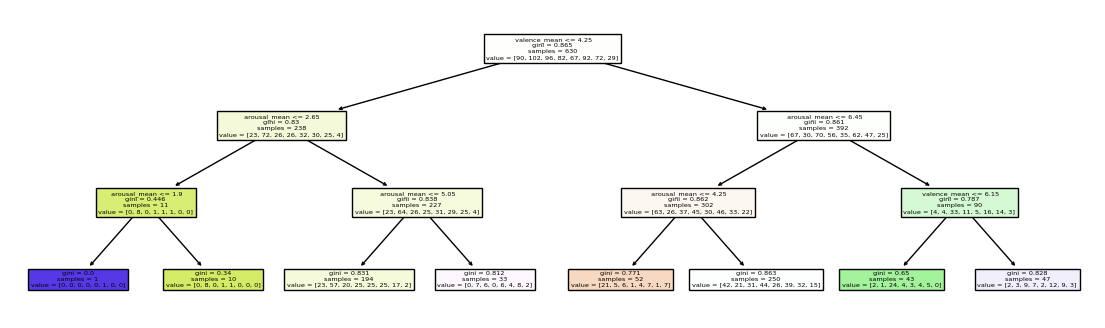

In [22]:
from sklearn.tree import plot_tree
plt.figure(figsize=(14, 4))
plot_tree(decision_tree=model_genre, feature_names=exp.columns, filled=True);

In [23]:
pred_genre = model_genre.predict(X_test_gen)
df_pred_genre = pd.DataFrame(pred_genre, columns=['pred'])
y_test_genre_df = pd.DataFrame(y_test_gen)
dif_genre = pd.concat([y_test_genre_df.reset_index(), df_pred_genre], axis = 1)
dif_genre

index           Genre            pred
0     158   \tClassical\t   \tClassical\t
1     500        \tJazz\t        \tJazz\t
2     396  \tElectronic\t   \tClassical\t
3     155   \tClassical\t   \tClassical\t
4     321  \tElectronic\t  \tElectronic\t
..    ...             ...             ...
65    549        \tJazz\t  \tElectronic\t
66    211   \tClassical\t         \tPop\t
67     55       \tBlues\t   \tClassical\t
68    135   \tClassical\t   \tClassical\t
69    672        \tRock\t  \tElectronic\t

[70 rows x 3 columns]

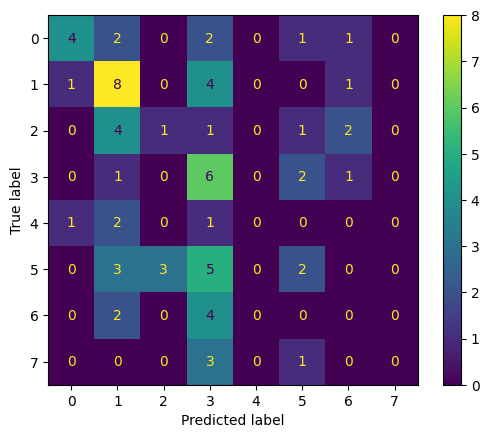

In [28]:
# matriz de confusion
import sklearn.metrics
conf_matrix = sklearn.metrics.confusion_matrix(dif_genre['Genre'], dif_genre['pred'])
conf_matrix_displayed = sklearn.metrics.ConfusionMatrixDisplay(conf_matrix)
conf_matrix_displayed.plot()


In [29]:
sklearn.metrics.accuracy_score(dif_genre['Genre'], dif_genre['pred'])

0.3